In [1]:
#This line needs to be executed only once. 
#Once Cobra is installed, no need to do it again.
#!pip install cobra

import cobra
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
scerv_cobra = cobra.io.read_sbml_model("yeast-GEM.xml")

print(f"Number of genes: {len(scerv_cobra.genes)}")


Number of genes: 1161


In [3]:
from cobra.flux_analysis import single_gene_deletion
from cobra import Model, Reaction, Metabolite


def read_csv_columns_pandas(file_path):
    """ This is just a utility function that
    returns list of columns and column names in a file"""
    df = pd.read_csv(file_path)
    column_names = df.columns.tolist()
    list_of_columns = [df[col].tolist() for col in column_names]
    return list_of_columns, column_names

#import the genes list
file_path = "DRGs_intestine_gene_crop_inModel.csv"  # replace with your file path
columns, columns_names = read_csv_columns_pandas(file_path)
    
genes = columns[1]
status = columns[2]


#segregate the essential from non essential genes from the list
essential_genes = [genes[g] for g in range(len(genes)) if status[g] == "essential"]
non_essential_genes = [genes[g] for g in range(len(genes)) if status[g] != "essential"]
#print("ESSENTIAL GENES:",essential_genes)
print(f"Number of essential genes: {len(essential_genes)}")
#print("\n\n\n")
#print("NOT_ESSENTIAL_GENES:",non_essential_genes)
print(f"Number of not essential genes: {len(non_essential_genes)}")

def is_false_positive(x, growth):
    if x == 'nan':
        return None
    
    for i in range(len(growth)):
        if growth[i] != 0:
            #print(essential_genes[x]+": False Negative")
            return False
        i += 1
    #print(essential_genes[x]+" True Positive")
    return True

#This is debugging line
#print(len(essential_genes))

Number of essential genes: 54
Number of not essential genes: 277


In [4]:
# Print all exchange reactions in your model
exchange_rxns = [rxn.id for rxn in scerv_cobra.exchanges]
#print(exchange_rxns)


In [ ]:
#Next steps should be run alternatively, as they define the settings mimicking different environments (as described in the first lines of each block)

In [5]:
#MIMNAL YEAST MEDIUM
#• CSM (without tryptophan): 0.74 g
#• Yeast Nitrogen Base: 6.66 g
#• Ammonium Sulfate: 5 g
#• Glucose: 20 g
#• Agar: 20 g

def minimal_metabolites():
    file_path = "metabolites_scervcobra.csv"
    columns, column_names = read_csv_columns_pandas(file_path)

    minimal_metabolites = ["D-glucose[e]", "ammonium[e]", "adenine[e]", "L-arginine[e]","L-histidine[e]", "L-leucine[e]",
                           "L-tryptophan[e], L-tyrosine[e]", "L-phenylalanine[e]", "L-isoleucine[e]", "L-threonine[e]", "L-methionine[e]"]
  

    names = columns[1]
    code_names = columns[8]


    #if lower_bound=-1000, then the availability of the 

    for name in names:
        metabolite = code_names[names.index(name)]
        if name in minimal_metabolites:
            scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -1000
            #scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0
            #print(name+", "+metabolite+" lower bound:"+str(scerv_cobra.metabolites.get_by_id(metabolite).lower_bound))
        else:
            scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = 0
            #scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 1000


minimal_metabolites()


In [ ]:
#YPD

def minimal_metabolites():
    file_path = "metabolites_scervcobra.csv"
    columns, column_names = read_csv_columns_pandas(file_path)

    H = ["D-glucose[e]"]
    E = ["L-alanine[e]", "L-aspartate[e]", "L-glutamate[e]", "L-glycine[e]","L-isoleucine[e]",
         "L-leucine[e]","L-lysine[e]", "L-proline[e]", "L-valine[e]", "potassium[e]",
         "sodium[e]"]
    D = ["L-arginine[e]", "L-asparagine[e]", "L-histidine[e]", "L-methionine[e]","L-phenylalanine[e]",
         "L-serine[e]","L-threonine[e]", "L-tyrosine[e]"]
    C = ["iron(2+)[e]", "L-cysteine[e]", "L-glutamine[e]", "L-tryptophan[e]"]
    B = ["cadmium(2+)[e]","pyridoxine[e]","riboflavin[e]","thiamine[e]"]
    A = ["biotin[e]"]
 

    names = columns[1]

    code_names = columns[8]

# for YPD

    for name in names:
        metabolite = code_names[names.index(name)]
        if name in H:
            scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -100
            scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 100
            #print(name+", "+metabolite+" lower bound:"+str(scerv_cobra.metabolites.get_by_id(metabolite).lower_bound))
        else: 
            if name in E:
                scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.001
                scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.001
            else:
                if name in D:
                    scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.0001
                    scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.0001
                else:
                    if name in C:
                        scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.00001
                        scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.00001
                    else:
                        if name in B:
                            scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.0000001
                            scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.0000001
                        else:
                            if name in A:
                                scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = 0
                                scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0
                            else:
                                scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = 0
                                scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0


In [ ]:
#crop

def minimal_metabolites():
    file_path = "metabolites_scervcobra.csv"
    columns, column_names = read_csv_columns_pandas(file_path)

    H = ["D-glucose[e]"]
    G = ["potassium[e]"]
    F = ["sodium[e]",""]
    D = ["L-glycine[e]"]
    C = ["iron(2+)[e]", "L-alanine[e]", "L-arginine[e]", "L-asparagine[e]", "L-aspartate[e]",
        "L-cysteine[e]", "L-glutamate[e]", "L-glutamine[e]", "L-isoleucine[e]", "L-lysine[e]",
        "L-methionine[e]", "L-phenylalanine[e]", "L-proline[e]", "L-serine[e]", "L-threonine[e]",
        "L-tyrosine[e]", "L-valine[e]", "pyridoxine[e]","thiamine[e]","L-tryptophan[e]"]
    B = ["biotin[e]","riboflavin[e]"]
    A = ["cadmium(2+)[e]","L-histidine[e]","L-leucine[e]"]
 

    names = columns[1]
    code_names = columns[8]

    for name in names:
        metabolite = code_names[names.index(name)]
        if name in H:
            scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -100
            scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 100
            #print(name+", "+metabolite+" lower bound:"+str(scerv_cobra.metabolites.get_by_id(metabolite).lower_bound))
        else: 
            if name in E:
                scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.001
                scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.001
            else:
                if name in D:
                    scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.0001
                    scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.0001
                else:
                    if name in C:
                        scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.00001
                        scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.00001
                    else:
                        if name in B:
                            scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.0000001
                            scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.0000001
                        else:
                            if name in A:
                                scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = 0
                                scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0
                            else:
                                if name in G:
                                    scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.1
                                    scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.1
                                else:
                                    if nabe in F:
                                        scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.01
                                        scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.01
                                    else: 
                                        scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = 0
                                        scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0
            


In [5]:
#gut

def minimal_metabolites():
    file_path = "metabolites_scervcobra.csv"
    columns, column_names = read_csv_columns_pandas(file_path)

    I = ["D-glucose[e]"]
    G = ["potassium[e]"]
    F = ["sodium[e]"]
    D = ["L-glycine[e]"]
    C = ["iron(2+)[e]", "L-alanine[e]", "L-arginine[e]", "L-asparagine[e]", "L-aspartate[e]",
        "L-cysteine[e]", "L-glutamate[e]", "L-glutamine[e]", "L-isoleucine[e]", "L-lysine[e]",
        "L-methionine[e]", "L-phenylalanine[e]", "L-proline[e]", "L-serine[e]", "L-threonine[e]",
        "L-tyrosine[e]", "L-valine[e]", "pyridoxine[e]","thiamine[e]"]
    B = ["biotin[e]","riboflavin[e]"]
    A = ["cadmium(2+)[e]","L-histidine[e]","L-leucine[e]","L-tryptophan[e]"]
 

    names = columns[1]
    code_names = columns[8]

    for name in names:
        metabolite = code_names[names.index(name)]
        if name in I:
            scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -1000
            scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 1000
            #print(name+", "+metabolite+" lower bound:"+str(scerv_cobra.metabolites.get_by_id(metabolite).lower_bound))
        else: 
            if name in E:
                scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.001
                scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.001
            else:
                if name in D:
                    scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.0001
                    scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.0001
                else:
                    if name in C:
                        scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.00001
                        scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.00001
                    else:
                        if name in B:
                            scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.0000001
                            scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.0000001
                        else:
                            if name in A:
                                scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = 0
                                scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0
                            else:
                                if name in G:
                                    scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.1
                                    scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.1
                                else:
                                    if nabe in F:
                                        scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = -0.01
                                        scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0.01
                                    else: 
                                        scerv_cobra.metabolites.get_by_id(metabolite).lower_bound = 0
                                        scerv_cobra.metabolites.get_by_id(metabolite).upper_bound = 0
            


In [6]:
# Optimize model
fba_solution = scerv_cobra.optimize()

# Show objective and flux distribution
print(f"Objective Value: {fba_solution.objective_value}")

# fba_solution.fluxes is a dictionary: {reaction_id: flux_value}
flux_distribution = fba_solution.fluxes

# If you just want the numerical min and max of the *flux values*:
max_flux_value = max(flux_distribution.values)
min_flux_value = min(flux_distribution.values)

print("Max flux value:", max_flux_value)
print("Min flux value:", min_flux_value)    

Objective Value: 0.08584396972646902
Max flux value: 9.116049668703752
Min flux value: -6.038061352987234


In [7]:
for reaction_id, flux_value in flux_distribution.items():
    reaction = scerv_cobra.reactions.get_by_id(reaction_id)
    #print(f"lower: {reaction.lower_bound},  upper: {reaction.upper_bound} flux: {flux_value}")

def set_flux_bounds():
    for reaction_id, flux_value in flux_distribution.items():
        if flux_value > 0:
            reaction = scerv_cobra.reactions.get_by_id(reaction_id).upper_bound = flux_value
        elif flux_value < 0:
            reaction = scerv_cobra.reactions.get_by_id(reaction_id).lower_bound = flux_value


set_flux_bounds()   

In [8]:
#print(scerv_cobra)
import pandas
genes_in_model=pandas.DataFrame(scerv_cobra.genes)
#print(genes_in_model)
#genes_in_model.to_csv('List_of_Genes_in_model.csv')


#######use this list to select the genes that can be deleted (then change the file that you upload earlier "DRGs_intestine_gene1.csv")

In [9]:
#to perform single gene deletion from a different set of the one uploaded earlier
knockout_results = single_gene_deletion(scerv_cobra,["YNR008W","YNR013C","YNR030W","YNR058W","YOL020W","YOL033W","YOL059W","YOL068C","YOL075C","YOL096C","YOL122C","YOL136C","YOL143C","YOR081C","YOR108W","YOR125C","YOR128C","YOR130C","YOR171C","YOR175C","YOR184W","YOR190W","YOR192C","YOR221C","YOR222W","YOR286W","YOR323C","YOR332W","YOR381W","YPL015C","YPL057C","YPL059W","YPL060W","YPL061W","YPL069C","YPL087W","YPL095C","YPL097W","YPL104W","YPL120W","YPL148C","YPL188W","YPL212C","YPL214C","YPL234C","YPL271W","YPR011C","YPR020W","YPR047W","YPR060C","YPR118W","YPR128C","YPR159W","YPR160W","YPR192W","YPR193C"])



growth = knockout_results.growth  
    
#finds the essential genes and saves them as a csv
essentials = knockout_results[knockout_results.growth == 0]
IDs = essentials.ids
print("# of essentials: "+str(len(IDs)))
#to save the results:
#IDs.to_csv('Fixed_Fluxes+Minimal_Medium_Essential_Genes_crop.csv', index =False)

#finds the nonessential genes and saves them as a csv
nonessentials_less_than_optimal_growth = knockout_results[(0 < knockout_results.growth) & (knockout_results.growth < 0.085)]
Nonessential_less_than_optimal = nonessentials_less_than_optimal_growth.ids
#Nonessential_less_than_optimal.to_csv('Fixed_Fluxes+Minimal_Medium_Nonessential(less_than_optimal)_Genes_crop.csv', index = False)

NONESSENTIAL = knockout_results[knockout_results.growth > 0]
NON = NONESSENTIAL.ids
neIDs = nonessentials_less_than_optimal_growth.ids
#print("# of nonessentials less than optimal: "+str(len(neIDs)))

#NON.to_csv('Fixed_Fluxes+Minimal_Medium_Nonessential_Genes_crop.csv', index = False)
    
    

# of essentials: 2


In [10]:
print(knockout_results)
print("essential: "+str(essentials))
print("non essential: "+str(NON))
print("non essential less than optimal: "+str(neIDs))

#save the results
#knockout_results.to_csv("~/Documents/HFSP/implementation/Boston_analysis/COMETS_KOs_for_Irene_20250605/temp.csv")
#"growth" = grams/hour


          ids        growth   status
0   {YPL069C}  8.584397e-02  optimal
1   {YNR030W}  8.584397e-02  optimal
2   {YNR058W}  8.584397e-02  optimal
3   {YPR128C}  8.584397e-02  optimal
4   {YOR108W}  8.584397e-02  optimal
5   {YPL120W}  8.584397e-02  optimal
6   {YPR192W}  8.584397e-02  optimal
7   {YOR381W}  8.584397e-02  optimal
8   {YOR222W}  8.584397e-02  optimal
9   {YOR081C}  8.584397e-02  optimal
10  {YOR221C}  8.584397e-02  optimal
11  {YPL188W}  8.584397e-02  optimal
12  {YOR286W}  8.584397e-02  optimal
13  {YPL060W}  8.584397e-02  optimal
14  {YPL015C}  8.584397e-02  optimal
15  {YOR192C}  8.584397e-02  optimal
16  {YOL068C}  8.584397e-02  optimal
17  {YOR332W}  8.584397e-02  optimal
18  {YPL097W}  8.584397e-02  optimal
19  {YNR013C}  8.584397e-02  optimal
20  {YOL136C}  8.584397e-02  optimal
21  {YPL234C}  8.584397e-02  optimal
22  {YOR184W}  6.636871e-03  optimal
23  {YOR125C}  8.584397e-02  optimal
24  {YOR190W}  8.584397e-02  optimal
25  {YOR175C}  6.859883e-02  optimal
2

In [ ]:
#.knockout_results("~/Documents/HFSP/implementation/Boston_analysis/test_out.txt")

In [11]:
optimal_growth = scerv_cobra.optimize()
print(optimal_growth)

<Solution 0.086 at 0x7804ed1ff5b0>


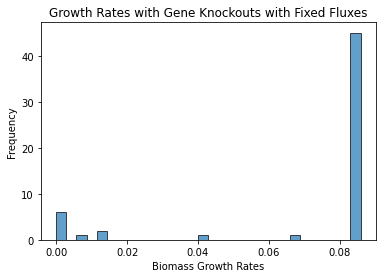

In [12]:
Growth = knockout_results.growth
data = Growth

# Create the histogram
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Growth Rates with Gene Knockouts with Fixed Fluxes')
plt.xlabel('Biomass Growth Rates')
plt.ylabel('Frequency')

plt.savefig('KOs_Growth_Rates_fixed_fluxes_crop.png')

# Show the plot
plt.show()